# District Literacy Analysis

## Introduction

In this notebook, I will analyze literacy rate data for districts in a large nation, where I am working as a data professional for the Department of Education. This dataset provides valuable insights into education levels across different regions. By exploring the distribution of literacy rates and identifying key patterns, this analysis will contribute to a better understanding of educational disparities and trends.

## Overview

In this notebook, I will explore and analyze literacy rate data for each district, applying various statistical techniques to summarize and interpret the dataset. To achieve this, I will perform the following analyses:

- Compute descriptive statistics to summarize district literacy rates.
- Use the normal distribution to model the data and identify patterns.
- Calculate z-scores to detect potential outliers.
- Simulate random sampling and estimate population means.
- Construct confidence intervals to assess the reliability of estimates.
- Conduct a two-sample hypothesis test to compare different district literacy rates.

By performing these analyses, I aim to gain a deeper understanding of literacy trends across districts, evaluate data distribution characteristics, and ensure the accuracy and reliability of the dataset for further research.


## Dataset Structure

### District Demographics Dataset
This dataset contains demographic and administrative information about various districts in a given state. Each record represents a district and includes details on its population, administrative divisions, and literacy rates. Below is a description of the key fields in this dataset:

- **DISTNAME**: The name of the district.
- **STATNAME**: The name of the state to which the district belongs.
- **BLOCKS**: The number of administrative blocks within the district.
- **VILLAGES**: The total number of villages in the district.
- **CLUSTERS**: The number of clusters present in the district.
- **TOTPOPULAT**: The total population of the district.
- **OVERALL_LI**: The overall literacy rate of the district (expressed as a percentage).


## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Exploring Data Insights: Computing Descriptive Statistics with Python

## Introduction

In this section, I will compute descriptive statistics to explore and summarize the literacy rate data for each district in the education dataset. Descriptive statistics provide key insights into the distribution, central tendency, and variability of the data, helping me better understand patterns and trends. This step follows data cleaning and serves as a crucial part of exploratory data analysis (EDA), allowing me to assess the dataset before moving on to more complex analyses. By summarizing the dataset numerically, I can identify potential outliers, detect inconsistencies, and gain a clearer picture of the overall data structure.

I will load the dataset and display a sample of the data.

In [3]:
education_districtwise = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\District-Literacy-Analysis\Data\education_districtwise.csv')

### Exploring the Data

To get a quick overview of the dataset, I use the `head()` function. This allows me to see the first few rows and understand the structure of the data.

In [4]:
education_districtwise.head(10)

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00
5,DISTRICT323,STATE1,12,523,96,1070144.0,64.32
6,DISTRICT114,STATE1,6,110,49,147104.0,80.48
7,DISTRICT438,STATE1,7,134,54,143388.0,74.49
8,DISTRICT610,STATE1,10,388,80,409576.0,65.97
9,DISTRICT476,STATE1,11,361,86,555357.0,69.90


Each row in this dataset represents a district, not a state or village. Some key columns I note:

- `VILLAGES`: Number of villages in each district

- `TOTPOPULAT`: Population of each district

- `OVERALL_LI`: Literacy rate for each district

Understanding this hierarchy helps me analyze the data correctly.

The hierarchy generally follows this structure:

Hierarchy: State → District → Block → Cluster → Village

#### Computing Descriptive Statistics

Once I have an idea of the dataset, I use Python’s `describe()` function to compute key statistics. This function is useful because it provides multiple descriptive statistics at once.

The main interest is the literacy rate. This data is contained in the `OVERALL_LI` column, which shows the literacy rate for each district in the nation.

In [5]:
education_districtwise['OVERALL_LI'].describe()

count    634.000000
mean      73.395189
std       10.098460
min       37.220000
25%       66.437500
50%       73.490000
75%       80.815000
max       98.760000
Name: OVERALL_LI, dtype: float64

Here’s what each metric means:

- `count`: Total number of districts with available literacy rate data

- `mean`: Average literacy rate across all districts

- `std`: Standard deviation, showing how much the data varies

- `min` and `max`: Lowest and highest literacy rates

- `25%`, `50%`, `75%`: Percentile values that help understand data distribution

The summary of stats gives me valuable insights into the overall literacy rate. For example, the mean helps me understand the center of my dataset—I now know that the average literacy rate is about 73% for all districts. This information is useful on its own and also serves as a basis for comparison. Knowing the mean literacy rate for all districts allows me to identify which individual districts are significantly above or below the average.

#### Analyzing Categorical Data

I also explore categorical data using `describe()`. For example, I check how many unique states are represented and which state appears the most:

In [6]:
education_districtwise['STATNAME'].describe()

count         680
unique         36
top       STATE21
freq           75
Name: STATNAME, dtype: object

For a categorical column, `describe()` gives you the following output: 

*   `count`: Number of non-NA/null observations
*  `unique`: Number of unique values
*   `top`: The most common value (the mode)
*   `freq`: The frequency of the most common value


The dataset contains 36 unique states. The most common state (`STATE21`) appears in 75 districts, meaning it has more districts compared to other states. This information could be useful in identifying states with a higher need for educational resources.

#### Calculating Range in Literacy Rate

To measure the spread of literacy rates, I calculate the range using the max() and min() functions.

In [7]:
range_overall_li = education_districtwise['OVERALL_LI'].max() - education_districtwise['OVERALL_LI'].min()
range_overall_li

np.float64(61.540000000000006)

The result shows a range of about 61.5 percentage points, indicating significant differences in literacy rates among districts. This variation highlights disparities in education levels across different regions.

### Key Takeaways

- The dataset contains literacy rate data for different districts, helping in identifying educational disparities.

- The average literacy rate is about 73%, providing a benchmark for comparison.

- Some districts have significantly lower literacy rates than others, with a range of 61.5 percentage points.

- The most common state in the dataset includes 75 districts, showing variation in state-wise district representation.

# Analyzing Probability Distributions in Python

## Introduction
In this section, I will use the normal distribution to model the data and compute z-scores to identify potential outliers. By analyzing the distribution of district literacy rates, I can determine whether the data follows a specific pattern and detect any anomalies. This builds on my previous analysis, where I summarized the data using descriptive statistics. Now, I will take a deeper dive into probability distributions to uncover meaningful insights about literacy rates across districts by determining whether the data follows a specific type of probability distribution.

Throughout this analysis, I will use pandas and numpy for data manipulation, matplotlib for visualization, and the SciPy stats module for statistical analysis. The SciPy stats module provides a comprehensive set of functions for working with probability distributions and statistical calculations, making it a valuable tool for this analysis.

In [8]:
education_districtwise = education_districtwise.dropna()

NOTE: I use dropna() to remove missing values in my data.

In [9]:
education_districtwise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    634 non-null    object 
 1   STATNAME    634 non-null    object 
 2   BLOCKS      634 non-null    int64  
 3   VILLAGES    634 non-null    int64  
 4   CLUSTERS    634 non-null    int64  
 5   TOTPOPULAT  634 non-null    float64
 6   OVERALL_LI  634 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.6+ KB


### Plot a histogram

The first step in trying to model my data with a probability distribution is to plot a histogram. This helps me visualize the shape of my data and determine if it resembles the shape of a specific distribution.

I use matplotlib’s histogram function to plot a histogram of the district literacy rate data. The `OVERALL_LI` column contains this data.

<Axes: >

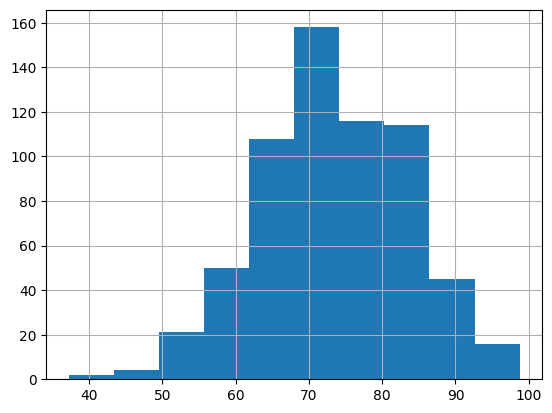

In [10]:
education_districtwise['OVERALL_LI'].hist()

## Normal distribution

The histogram shows that the distribution of the literacy rate data is bell-shaped and symmetric about the mean. The mean literacy rate, which is around 73%, is located in the center of the plot. The normal distribution is a continuous probability distribution that is bell-shaped and symmetrical on both sides of the mean. The shape of the histogram suggests that the normal distribution might be a good modeling option for the data.

## Empirical rule

Since the normal distribution seems like a good fit for the district literacy rate data, I can expect the empirical rule to apply relatively well. **The empirical rule** states that for a normal distribution:

- **68%** of the values fall within +/- 1 SD from the mean

- **95%** of the values fall within +/- 2 SD from the mean

- **99.7%** of the values fall within +/- 3 SD from the mean

NOTE: "SD" stands for standard deviation.

 In other words, we can expect that about:

*   **68%** of district literacy rates will fall within +/- 1 SD from the mean.
*   **95%** of district literacy rates will fall within +/- 2 SD from the mean.
*   **99.7%** of district literacy rates will fall within +/- 3 SD from the mean.



I name two new variables to store the values for the mean and standard deviation of the district literacy rate: `mean_overall_li` and `std_overall_li`.

In [11]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
std_overall_li = education_districtwise['OVERALL_LI'].std()
print(mean_overall_li)
print(std_overall_li)

73.39518927444796
10.098460413782467


- The mean district literacy rate is about 73.4%.
- The standard deviation is about 10%.

Now, I will compute the actual percentage of district literacy rates that fall within ±1 standard deviation from the mean.

First, I will define two new variables: lower_limit and upper_limit. The lower limit represents one standard deviation below the mean, calculated as mean - (1 * SD), while the upper limit represents one standard deviation above the mean, calculated as mean + (1 * SD). To perform these calculations, I will use my previously defined variables, mean_overall_li and std_overall_li, which store the mean and standard deviation.

Next, I will write a line of code that checks whether each value in the OVERALL_LI column falls between the lower and upper limits. I will use relational operators (>= and <=) along with the bitwise AND (&) operator to filter these values. Finally, I will apply the mean() function to determine the proportion of values within this range, effectively dividing the count of values within 1 standard deviation of the mean by the total number of values.

In [12]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.6640378548895899)

Using the explicit 1 × SD notation is functionally the same as directly adding or subtracting the standard deviation, but it improves clarity and flexibility. This approach is especially useful when adjusting the range, such as using 2 × SD for a broader interval. It also makes the code more readable and easier for others to understand.

Now, I will use the same code structure to calculate the percentage of district literacy rates that fall within ±2 standard deviations from the mean.

In [13]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.9542586750788643)

Finally, I compute the actual percentage of district literacy rates that fall within +/- 3 SD from the mean.

In [14]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.9968454258675079)

My calculated values—66.4%, 95.4%, and 99.6%—align closely with the empirical rule, which predicts approximately 68%, 95%, and 99.7%. This confirms that my data follows a normal distribution.

A normal distribution is valuable in analysis since many statistical tests and machine learning models rely on this assumption. Additionally, it allows me to use z-scores to determine the relative position of values and detect outliers.

If my data isn't normally distributed, alternative outlier detection methods may be more suitable:

- Interquartile Range (IQR): Identifies outliers based on values beyond 1.5 times the IQR.
- Modified Z-Scores (MAD-based): Uses the median and median absolute deviation, making it more robust to non-normal data.
- Boxplots: Provide a visual representation of data spread and highlight extreme values without assuming normality.

## Compute z-scores to find outliers

A z-score is a measure of how many standard deviations below or above the population mean a data point is. A z-score is useful because it tells me where a value lies in a distribution.

Data professionals often use z-scores for outlier detection. Typically, they consider observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean.

To find outliers in the data, I first create a new column called `Z_SCORE` that includes the z-scores for each district literacy rate in my dataset.

In [15]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


Now that I have computed z-scores for my dataset, I write some code to identify outliers, or districts with z-scores that are more than +/- 3 SDs from the mean.

In [16]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


Using z-scores, I identify two outlying districts that have unusually low literacy rates: DISTRICT461 and DISTRICT429. The literacy rates in these two districts are more than 3 SDs below the overall mean literacy rate.

My analysis gives me important information to share. The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy.


### Key Takeaways

- The literacy rate data follows a normal distribution, making it suitable for statistical analysis using the empirical rule and z-scores.  
- The average literacy rate is around **73%**, serving as a central reference point for district comparisons.  
- The empirical rule holds well for this dataset, with approximately **66.4%**, **95.4%**, and **99.6%** of values falling within **1, 2, and 3 standard deviations** from the mean, respectively.  
- Z-scores help identify outliers—districts with unusually low literacy rates. Two districts (**DISTRICT461 and DISTRICT429**) were found to have literacy rates more than **3 standard deviations below** the mean.  
- These findings can inform policy decisions, as districts with significantly lower literacy rates may require targeted interventions, funding, and educational resources.

# Mastering Sampling in Python: Techniques and Applications

## Introduction
In this section, I will use Python to simulate random sampling and estimate population parameters from sample data. By leveraging libraries such as NumPy, pandas, SciPy stats, and statsmodels, I will perform statistical operations and analyze sample distributions. Additionally, I will use Matplotlib to visualize data and extract insights from my simulations. These exercises will deepen my understanding of sampling, point estimation, and the role of randomness in statistical inference.

I continue with my previous scenario, in which I am a data professional working for the Department of Education of a large nation. I analyze data on literacy rates for each district. Since I have limited time to collect data, I can only survey 50 randomly chosen districts instead of the 634 districts included in my original dataset. My goal is to estimate the mean literacy rate for all 634 districts based on my sample of 50 districts.

### Simulate Random Sampling

To simulate taking a random sample of 50 districts from my dataset, I use `pandas.DataFrame.sample()`. This function allows me to randomly select rows based on specific arguments:

- `n=50`: Specifies that I want a sample size of 50 districts.
- `replace=True`: Enables sampling with replacement, meaning the same district can be selected multiple times.
- `random_state=31208`: Sets a fixed seed for reproducibility, ensuring I get the same random sample each time I run the code.
Now, I write my code to generate the sample by assigning it to a new variable, sampled_data, using the `sample()` function with the specified arguments.

In [17]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14,1.857670
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49,-2.071771
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14,-1.115425
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33,0.290849
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70,1.318549
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35,-0.499994
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94,-1.333452
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69,-0.466299
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31,1.081692
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61,-0.375124


The output shows 50 districts randomly selected from my dataset, with some potential duplicates due to sampling with replacement.

#### Compute the Sample Mean

Now that I have my random sample, I compute the sample mean:

In [18]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

np.float64(74.22359999999999)

The sample mean for district literacy rate is approximately **74.22%**, serving as a point estimate of the population mean based on my random sample of 50 districts. The population mean, however, represents the literacy rate for *all* districts. Due to sampling variability, the sample mean typically differs slightly from the actual population mean.  

Now, I’ll compute the sample mean using a different random sample of 50 districts. To do this, I’ll create a new variable called `estimate2`, set `n = 50`, and keep `replace = True`. This time, I’ll use a different random seed, **56,810**, to ensure a new sample is generated. Finally, I’ll apply `mean()` to calculate the sample mean.


In [19]:
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=56810).mean()
estimate2

np.float64(74.2478)

The second sample mean is about 74.25%. Due to sampling variability, this sample mean differs slightly from my previous estimate.

### The Central Limit Theorem

The central limit theorem states that when the sample size is large enough, the sample mean approaches a normal distribution. As I sample more observations, the sample mean gets closer to the population mean.

In this case, the population mean represents the overall literacy rate for *all* districts in the nation. Earlier, I found that the population mean literacy rate is **73.39%**. Based on sampling, my first estimated sample mean was **74.22%**, and my second estimate was **74.24%**. Both estimates are relatively close to the population mean, demonstrating how random sampling can provide reasonable approximations of the true population parameter.  


I find the population mean:

In [20]:
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

np.float64(73.39518927444796)

The population mean literacy rate is 73.39%. Both sample means (74.22% and 74.25%) are relatively close to this value.



#### Compute the Mean of a Sampling Distribution with 10,000 Samples

Now, imagine this study is repeated **10,000 times**, obtaining **10,000 point estimates** of the mean. In other words, I take **10,000 random samples** of **50 districts** and compute the mean for each sample. According to the **central limit theorem**, the mean of this **sampling distribution** will be roughly equal to the **population mean**, reinforcing the idea that repeated random sampling provides an accurate estimate of the true population parameter.  


In [21]:
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
    
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

In the code above, the **random seed** is not set inside the loop, meaning the random sampling for each iteration may not be reproducible. If I want to ensure that the results are **consistent across runs**, I would set the random seed inside the loop or before it starts.

Since a **random seed** wasn’t specified for each loop iteration, the rows sampled will be different by default each time the code is executed.

Now, I will name a new variable, `mean_sample_means`, and compute the **mean for the sampling distribution** of **10,000 random samples**.


In [22]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

np.float64(73.38331215999999)

The mean of my sampling distribution is about 73.4%, which is essentially identical to the population mean.



#### Visualize the Data

To visualize the relationship between the **sampling distribution** of **10,000 estimates** and the **normal distribution**, I will plot both simultaneously.


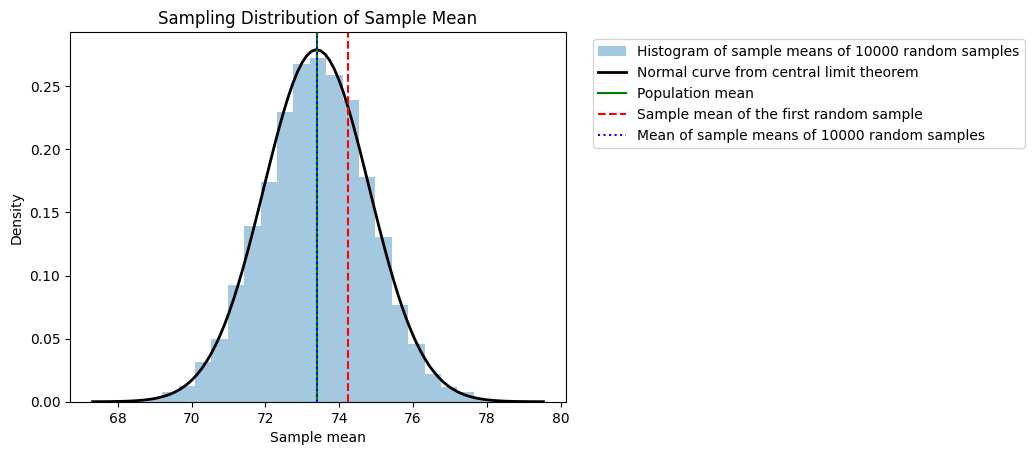

In [23]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label="Histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p, 'k', linewidth=2, label='Normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle='solid', label='Population mean')
plt.axvline(x=estimate1, color='r', linestyle='--', label='Sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle=':', label='Mean of sample means of 10000 random samples')
plt.title("Sampling Distribution of Sample Mean")
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

#### Observations from the Sampling Distribution Graph

- The histogram of the sampling distribution closely follows a normal curve, as predicted by the central limit theorem.

- The mean of the sampling distribution (blue dotted line) overlaps with the population mean (green solid line), confirming their similarity.

- The sample mean of my first estimate (red dashed line) is farther from the center due to sampling variability.

The central limit theorem demonstrates that as I increase the sample size, my estimate becomes more accurate. My first sample of 50 districts estimated the mean district literacy rate as 74.22%, which is close to the population mean of 73.4%.

To make my estimate useful to the government, I compare the nation's literacy rate to other benchmarks, such as the global literacy rate or the literacy rate of peer nations. If the nation's literacy rate is below these benchmarks, this may help justify allocating more resources to improve literacy across the country.

### Key Takeaways

- Different random samples result in slightly different sample means due to natural sampling variability.

- As sample size increases, the sample mean distribution approaches a normal curve, improving estimate reliability.

- The mean of 10,000 sample means (73.4%) closely matches the population mean (73.39%), confirming accurate estimation.

- Larger sample sizes reduce variability and improve the precision of point estimates.

- The sampling distribution follows a normal curve, validating the Central Limit Theorem (CLT).

# Constructing Confidence Intervals with Python

## Introduction 

In this section, I will learn how to use Python to construct confidence intervals for point estimates. Confidence intervals provide a range of values within which the true population parameter is likely to fall, helping to quantify uncertainty in statistical estimates. I will explore how to calculate and interpret confidence intervals, enhancing my understanding of statistical inference and data-driven decision-making.

### Selecting a Random Sample

I work with a random sample of 50 districts from the dataset. To maintain consistency in results, I set the random_state parameter to 31208.

In [24]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14,1.857670
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49,-2.071771
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14,-1.115425
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33,0.290849
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70,1.318549
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35,-0.499994
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94,-1.333452
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69,-0.466299
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31,1.081692
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61,-0.375124


### Constructing a 95% Confidence Interval

To construct a 95% confidence interval for the mean district literacy rate, I follow these four steps:

1. Identify a sample statistic

2. Choose a confidence level

3. Find the margin of error

4. Calculate the interval

### `scipy.stats.norm.interval()`

Earlier, I worked through these steps one by one to construct a confidence interval. With Python, I can construct a confidence interval with just a **single line of code**—getting results **faster**!  

If working with a **large sample size** (greater than **30**), I can use `scipy.stats.norm.interval()` to construct a confidence interval for the mean. This function requires the following arguments:  

- **`alpha`**: The confidence level  
- **`loc`**: The sample mean  
- **`scale`**: The sample standard error  


#### `alpha`: The Confidence Level  

The **Department of Education** requests a **95% confidence level**, which is the accepted standard for **government-funded research**.


#### Sample Mean
#### `loc`: The Sample Mean  


First, I compute the mean literacy rate for the sample data:


The **sample mean** represents the average literacy rate of a randomly selected sample of **50 districts**.  

Now, I will name a new variable, `sample_mean`, and compute the **mean district literacy rate** for the sample data.


In [25]:
sample_mean = sampled_data['OVERALL_LI'].mean()
sample_mean

np.float64(74.22359999999999)

#### Sample Standard Error

#### `scale`: The Sample Standard Error  


Next, I calculate the estimated standard error:

The **standard error** measures the variability of the sample data. It is calculated as the **sample standard deviation divided by the square root of the sample size**.  

**Note:** In practice, the true standard error is usually unknown, so it is replaced with the **estimated standard error**.


In [26]:
estimated_standard_error = sampled_data['OVERALL_LI'].std() / np.sqrt(sampled_data.shape[0])

#### Computing the Confidence Interval

Using scipy.stats.norm.interval(), I construct the 95% confidence interval:

In [27]:
stats.norm.interval(confidence=0.95, loc=sample_mean, scale=estimated_standard_error)

(np.float64(71.42241096968617), np.float64(77.02478903031381))

This results in a 95% confidence interval for the mean district literacy rate of approximately (71.42, 77.02).

The Department of Education will use this estimate of the mean district literacy rate to help make decisions about distributing funds to different states.  

### Constructing a 99% Confidence Interval'

To compute a 99% confidence interval, I modify the alpha parameter to `0.99`:Now, imagine that a **senior director** in the department wants to be even *more* confident about my results. To ensure a **reliable estimate**, the director suggests recalculating the confidence interval with a **99% confidence level**.

To compute a **99% confidence interval** using the same sample data, I simply change the **`alpha`** value to `0.99`.


In [28]:
stats.norm.interval(confidence=0.95, loc=sample_mean, scale=estimated_standard_error)

(np.float64(71.42241096968617), np.float64(77.02478903031381))

This results in a 95% confidence interval for the mean district literacy rate of approximately (71.42, 77.02).

#### Relationship Between Confidence Level and Confidence Interval

Observing the confidence intervals:

95% CI: (71.42, 77.02) → Covers 5.6 percentage points

99% CI: (70.54, 77.90) → Covers 7.4 percentage points

As the confidence level increases, the confidence interval becomes wider. A wider confidence interval increases the likelihood of including the actual population parameter.

These results will assist the Department of Education in distributing government resources to improve literacy rates.

### Key Takeaways

- Confidence intervals provide a range where the true population mean is likely to fall, helping quantify uncertainty in estimates.

- A higher confidence level increases the likelihood of capturing the true mean but results in a wider interval.

- The standard error, derived from sample variability, is crucial for constructing confidence intervals.

- Python's `scipy.stats.norm.interval()` function simplifies confidence interval calculations for large samples.

- Confidence intervals support data-driven decision-making, such as allocating resources in education.

# Conducting a Two-Sample Hypothesis Test in Python

## Introduction

In this section, I will use Python to conduct a two-sample hypothesis test. Hypothesis testing is a fundamental statistical technique used to compare two groups and determine whether their differences are statistically significant. I will apply key statistical concepts, leverage Python libraries such as SciPy, and confidently interpret the results of my hypothesis test.

This section continues the scenario, where I am a data professional working for the Department of Education of a large nation. I analyze data on literacy rates for each district.

The Department of Education asks me to collect data on mean district literacy rates for two of the nation’s largest states: STATE21 and STATE28. STATE28 has almost 40 districts, and STATE21 has more than 70. Due to limited time and resources, I am only able to survey 20 randomly chosen districts in each state. The department asks me to determine if the difference between the two mean district literacy rates is statistically significant or due to chance. This helps decide how to distribute government funding to improve literacy.

In this activity, I use Python to simulate taking a random sample of 20 districts in each state and conduct a two-sample t-test based on the sample data.

### Explore the Data

To start, I filter the dataframe for the district literacy rate data from the states STATE21 and STATE28.

In [29]:
state21 = education_districtwise[education_districtwise['STATNAME'] == "STATE21"]
state28 = education_districtwise[education_districtwise['STATNAME'] == "STATE28"]

#### Simulate Random Sampling

Now that I have organized my data, I use the `sample()` function to take a random sample of 20 districts from each state.

In [30]:
sampled_state21 = state21.sample(n=20, replace=True, random_state=13490)
sampled_state28 = state28.sample(n=20, replace=True, random_state=39103)

#### Compute the Sample Means

I now have two random samples of 20 districts—one sample for each state. Next, I use `mean()` to compute the mean district literacy rate for both STATE21 and STATE28.

In [31]:
mean_state21 = sampled_state21['OVERALL_LI'].mean()
mean_state28 = sampled_state28['OVERALL_LI'].mean()
diff_means = mean_state21 - mean_state28
print(mean_state21)
print(mean_state28)
print(diff_means)

70.82900000000001
64.60100000000001
6.227999999999994


STATE21 has a mean district literacy rate of about 70.8%, while STATE28 has a mean district literacy rate of about 64.6%.


The observed difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points.

**Note**: At this point, one might be tempted to conclude that **STATE21** has a higher overall literacy rate than **STATE28**. However, due to **sampling variability**, this observed difference could simply be due to **chance** rather than an actual difference in the **population means**.

To determine whether this difference is **statistically significant**, I will conduct a **hypothesis test**.


#### Conduct a Hypothesis Test

Now that I have organized my data and simulated random sampling, I am ready to conduct my hypothesis test.

#### Step 1: State the Null and Alternative Hypothesis

The **null hypothesis** is a statement that is assumed to be true unless there is **convincing evidence** to the contrary. The **alternative hypothesis** contradicts the null hypothesis and is only accepted if there is strong evidence to support it.

In a **two-sample t-test**, the **null hypothesis** states that there is **no difference** between the means of the two groups. The **alternative hypothesis** asserts the opposite: that there **is** a difference between the means of the two groups.

I use $H_0$ to denote the null hypothesis and $H_a$ to denote the alternative hypothesis.


  - Null hypothesis (H₀): There is no difference in the mean district literacy rates between STATE21 and STATE28.

  - Alternative hypothesis (Hₐ): There is a difference in the mean district literacy rates between STATE21 and STATE28.
  
#### Step 2: Choose a Significance Level

The **significance level** is the threshold at which I will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. The Department of Education asked  me to use their standard level of 5%, or 0.05.  

I use a significance level of 5%, or 0.05.

#### Step 3: Find the P-Value

The **p-value** represents the probability of observing results as or more extreme than those observed, assuming the **null hypothesis** is true.

Based on the sample data, the **difference between the mean district literacy rates** of **STATE21 and STATE28** is **6.2 percentage points**. The **null hypothesis** suggests that this difference is purely due to chance. 

The **p-value** measures the probability of observing an absolute difference in sample means **of 6.2 or greater**, given that the null hypothesis holds. If this probability is **very low**—specifically, if the **p-value is less than 5% (0.05)**—then the null hypothesis will be **rejected**.


I use `scipy.stats.ttest_ind()` to compute my p-value.

For a two-sample $t$-test, I can use `scipy.stats.ttest_ind()` to compute your p-value. This function includes the following arguments:

*   `a`: Observations from the first sample 
*   `b`: Observations from the second sample
*   `equal_var`: A boolean, or true/false statement, which indicates whether the population variance of the two samples is assumed to be equal. 
  
In this example, I don’t have access to data for the **entire population**, so I should avoid assuming anything about the **variance**. To prevent making an incorrect assumption, I will set this argument to **False**.


In [32]:
p_value = stats.ttest_ind(sampled_state21['OVERALL_LI'], sampled_state28['OVERALL_LI'], equal_var=False).pvalue

p_value

np.float64(0.006421719142765237)

The computed p-value is about 0.0064, or 0.64%.

#### Step 4: Reject or Fail to Reject the Null Hypothesis

I compare my p-value with the significance level:

If the p-value is less than 0.05, I reject the null hypothesis.

If the p-value is greater than 0.05, I fail to reject the null hypothesis.

Since my p-value of 0.0064 is less than 0.05, I reject the null hypothesis and conclude that there is a statistically significant difference between the mean district literacy rates of the two states. This analysis helps the Department of Education decide how to distribute government resources. Since STATE28 has a lower literacy rate, it will likely receive more resources to improve literacy.

### Key Takeaways

- A two-sample hypothesis test helps determine if the difference between two group means is statistically significant.

- Using Python’s `sample()` function ensures unbiased sample selection, making statistical conclusions more reliable.

- A low p-value (0.0064) indicates strong evidence against the null hypothesis, confirming a significant difference in literacy rates between the two states.

- Statistical analysis guides resource allocation, ensuring funding is directed toward states with lower literacy rates.

- The `scipy.stats.ttest_ind()` function simplifies hypothesis testing, making it accessible for real-world applications in education and beyond.

# Conclusion

The District Literacy Analysis project provided a comprehensive exploration of literacy rate data across various districts in a large nation. Through descriptive statistics, probability distribution analysis, random sampling, confidence intervals, and hypothesis testing, we uncovered significant insights into the educational landscape. Key findings include the identification of a normal distribution in literacy rates, the detection of outliers with unusually low literacy rates, and the confirmation of statistically significant differences in literacy rates between two major states. The analysis revealed that the average literacy rate across districts is approximately 73%, with notable disparities that highlight the need for targeted interventions. These insights are crucial for informing policy decisions and resource allocation to improve literacy rates nationwide.

## Top Three Recommendations Based on Insights

- **Targeted Interventions for Low-Literacy Districts**: The analysis identified two districts (DISTRICT461 and DISTRICT429) with literacy rates more than three standard deviations below the mean. These districts should be prioritized for additional funding, educational resources, and targeted programs to address the underlying causes of low literacy rates.

- **Resource Allocation Based on State-Level Disparities**: The hypothesis test revealed a statistically significant difference in literacy rates between STATE21 and STATE28. Given that STATE28 has a lower literacy rate, it should receive more resources and support from the Department of Education to bridge the gap and improve educational outcomes.

- **Enhanced Data Collection and Monitoring**: While the dataset provided valuable insights, there is a need for more comprehensive and up-to-date data collection. Implementing regular surveys and monitoring mechanisms will help track progress, identify emerging trends, and ensure that interventions are effective in improving literacy rates.

## Application of Insights

The insights gained from this analysis have several practical applications:

- **Policy Formulation and Resource Allocation**: The findings can guide policymakers in formulating targeted policies and allocating resources to districts and states with the greatest need. By focusing on low-literacy districts and states, the government can ensure that resources are used effectively to improve literacy rates.

- **Educational Program Development**: The identification of specific districts and states with low literacy rates can inform the development of tailored educational programs. These programs can address the unique challenges faced by these regions, such as lack of infrastructure, teacher shortages, or socioeconomic barriers.

- **Monitoring and Evaluation**: The insights can be used to establish a framework for monitoring and evaluating the impact of interventions. By tracking literacy rates over time, the Department of Education can assess the effectiveness of its programs and make data-driven adjustments to ensure continuous improvement.


## Application of Insights

The insights gained from this analysis have several practical applications:

- **Policy Formulation and Resource Allocation**: The findings can guide policymakers in formulating targeted policies and allocating resources to districts and states with the greatest need. By focusing on low-literacy districts and states, the government can ensure that resources are used effectively to improve literacy rates.

- **Educational Program Development**: The identification of specific districts and states with low literacy rates can inform the development of tailored educational programs. These programs can address the unique challenges faced by these regions, such as lack of infrastructure, teacher shortages, or socioeconomic barriers.

- **Monitoring and Evaluation**: The insights can be used to establish a framework for monitoring and evaluating the impact of interventions. By tracking literacy rates over time, the Department of Education can assess the effectiveness of its programs and make data-driven adjustments to ensure continuous improvement.

## Next Steps

- **Expand Data Collection and Analysis**: Future efforts should focus on expanding the dataset to include more recent data and additional variables that may influence literacy rates, such as socioeconomic indicators, school infrastructure, and teacher qualifications. This will provide a more comprehensive understanding of the factors affecting literacy and enable more targeted interventions.

- **Develop Predictive Models**: Using the insights from this analysis, predictive models can be developed to forecast future literacy rates based on historical trends and other influencing factors. These models can help policymakers anticipate challenges and proactively allocate resources to prevent further disparities.

- **Conduct Regional-Specific Studies**: While this analysis provided a broad overview of literacy rates across districts, regional-specific studies can offer deeper insights into localized challenges and opportunities. For example, focusing on rural versus urban districts or specific states can help identify unique trends and inform more targeted strategies.

- **Integrate with Other Educational Data**: Combining literacy rate data with other educational datasets, such as dropout rates, student performance, and teacher training programs, can provide a more holistic understanding of the educational landscape. This integrated approach can enhance the accuracy of predictive models and improve the effectiveness of intervention strategies.

- **Address Data Quality Issues**: Ongoing efforts should be made to address any data quality issues, such as missing values or inconsistencies. Implementing automated data validation processes can help ensure the dataset's integrity and reliability for future analyses.

By building on the insights from this project, future research can further advance our understanding of literacy trends and their implications for educational policy, resource allocation, and program development. This will ultimately contribute to the nation's goal of achieving equitable and high-quality education for all.